<a href="https://colab.research.google.com/github/LatiefDataVisionary/customer-segmentation-strategy/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vetrirah/customer")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/Train.csv")

df.head()

100%|██████████| 105k/105k [00:00<00:00, 55.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vetrirah/customer/versions/1


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [3]:
df.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [4]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [7]:
import os

# List files in the downloaded directory
print(os.listdir(path))

['Train.csv', 'Test.csv', 'sample_submission.csv']


In [8]:
# Download latest version
path = kagglehub.dataset_download("vetrirah/customer")

print("Path to dataset files:", path)

df2 = pd.read_csv(f"{path}/Test.csv")

df2.head()

Path to dataset files: /kaggle/input/customer


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [10]:
df2.describe(include='all')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,2627.000000,2627,2577,2627.000000,2603,2589,2358.000000,2627,2514.000000,2595
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6
freq,NaN,1424,1520,NaN,1602,802,NaN,1616,NaN,1672
mean,463433.918919,NaN,NaN,43.649791,NaN,NaN,2.552587,NaN,2.825378,NaN
std,2618.245698,NaN,NaN,16.967015,NaN,NaN,3.341094,NaN,1.551906,NaN
min,458989.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN
25%,461162.500000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN
50%,463379.000000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,2.000000,NaN
75%,465696.000000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN


In [11]:
df2.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [12]:
df2.duplicated().sum()

np.int64(0)

# **Customer Segmentation Analysis Project**

**Project By:** Lathif Ramadhan

## **Dataset**

- **Name:** Customer Segmentation
- **Source:** Kaggle (vetrirah/customer)
- **Link:** https://www.kaggle.com/datasets/vetrirah/customer
- **Description:** This dataset contains information about customers, including demographics, lifestyle, and spending habits, aiming to identify distinct customer groups for targeted marketing strategies.

## **Project Overview**

This end-to-end data science project focuses on performing a comprehensive customer segmentation analysis using the provided dataset. The project aims to achieve two main goals:

1.  **Supervised Classification:** Build and evaluate classification models (SVC, Decision Tree, Naive Bayes) to predict the existing `Segmentation` labels in the dataset.
2.  **Unsupervised Clustering:** Apply clustering algorithms (K-Means, DBSCAN) to identify natural customer groups based on their attributes, without using the existing `Segmentation` labels.

The project will follow a structured approach, including:

*   **Data Loading and Initial Exploration (EDA):** Loading the data, understanding its structure, checking for missing values and duplicates, and performing initial visualizations.
*   **Data Preprocessing:** Handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.
*   **Supervised Modeling:** Training and evaluating classification models to predict the `Segmentation` column.
*   **Unsupervised Clustering:** Applying clustering techniques to discover underlying customer segments.
*   **Interpretation and Findings:** Analyzing and interpreting the results from both classification and clustering approaches.
*   **Conclusion and Recommendations:** Summarizing key findings and providing actionable business recommendations for marketing strategies.
*   **Code Refactoring and Documentation:** Ensuring the notebook is clean, well-commented, and structured for a professional portfolio.

This notebook serves as a step-by-step guide through the entire process, demonstrating best practices in data analysis and machine learning.

## **Phase 1: Setup and Initial Data Exploration**

**Objective:** Prepare the working environment, load the data, and perform initial checks to understand the data structure and quality.

### **Task 1.1 - Import Libraries**

First, we need to import all the necessary Python libraries that will be used throughout the project. We'll need `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` and `seaborn` for visualization, and `train_test_split` from `sklearn.model_selection` for splitting data later.

In [13]:
# Task 1.1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### **Task 1.2 - Load Data**

Next, we will load the `Train.csv` dataset into a Pandas DataFrame named `df`. Based on the previous execution output, the file is located at `/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1/Train.csv`. We will use this path to read the data.

In [14]:
# Task 1.2 - Load Data
# Using the path found from previous execution
path = "/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1"
df = pd.read_csv(f"{path}/Train.csv")

### **Task 1.3 - Initial Inspection**

Once the data is loaded, it's crucial to perform an initial inspection to understand the data structure, data types of each column, presence of missing values, and a statistical summary. This will give us an overview of the data's "health" before proceeding with further preprocessing. We will use the `.head()`, `.info()`, `.describe()`, `.isnull().sum()`, and `.duplicated().sum()` methods for this.

In [15]:
# Task 1.3 - Initial Inspection

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display summary info
print("\nSummary information of the dataset:")
df.info()

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(df.describe(include='all'))

# Count and display missing values per column
print("\nNumber of missing values per column:")
display(df.isnull().sum())

# Check for duplicated rows
print("\nNumber of duplicated rows:")
display(df.duplicated().sum())

First 5 rows of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A



Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB

Descriptive statistics of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN



Number of missing values per column:


,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76



Number of duplicated rows:


np.int64(0)

## **Phase 2: Exploratory Data Analysis (EDA)**

**Objective:** Delve deeper into the data using visualizations to uncover patterns, relationships, and anomalies. For each plot, provide the code and a brief interpretation of what we observe.

### **Task 2.1 - Target Variable Analysis**

Let's start by analyzing the distribution of our target variable, `Segmentation`. By looking at the count of observations in each segment, we can understand if our dataset has a balanced or imbalanced class distribution. This is important to consider when building classification models later.

/tmp/ipython-input-904027992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segmentation', palette='viridis')


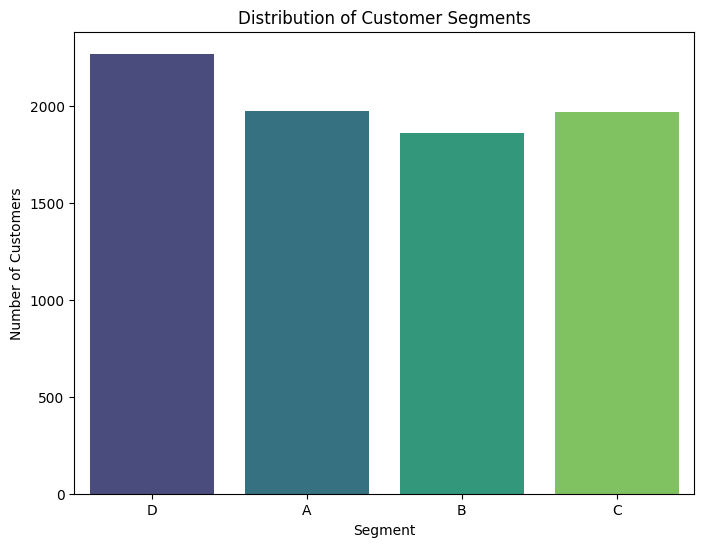

In [16]:
# Task 2.1 - Target Variable Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Segmentation', palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

# Interpretation:
# From the plot above, we can see the distribution of customer counts in each segment (A, B, C, D).
# Observe if the number of customers in each segment is relatively similar (balanced) or if one or more segments dominate (imbalanced).

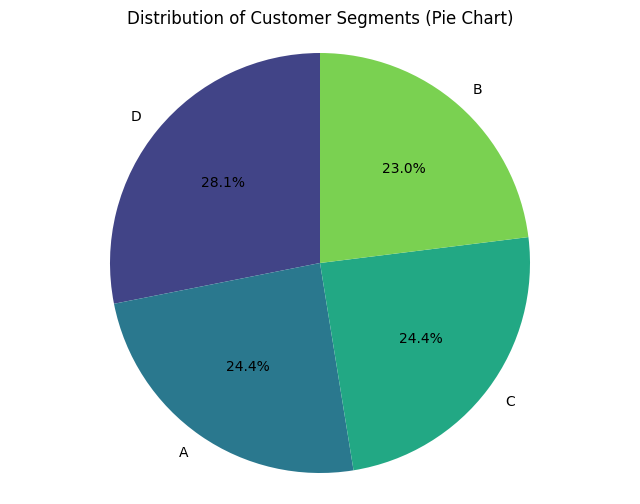

In [18]:
# Calculate the counts of each segment
segment_counts = df['Segmentation'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(x=segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
# Calculate the percentage of each segment
segment_percentages = df['Segmentation'].value_counts(normalize=True) * 100

# Create a DataFrame to display the distribution
segment_distribution_table = pd.DataFrame({
    'Count': segment_counts,
    'Percentage (%)': segment_percentages
})

# Sort the table by count in descending order
segment_distribution_table = segment_distribution_table.sort_values(by='Count', ascending=False)

print("Distribution of Customer Segments:")
display(segment_distribution_table)

Distribution of Customer Segments:


,Count,Percentage (%)
Segmentation,,
D,2268,28.111056
A,1972,24.442241
C,1970,24.417452
B,1858,23.029251


### **Task 2.2 - Univariate Analysis**

Next, we will examine the distribution of each variable individually. For categorical variables, we will use countplots to see the frequency of each category. For numerical variables, we will use histograms to see the shape of their distribution (normal, skewed, etc.) and boxplots to identify potential outliers.

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


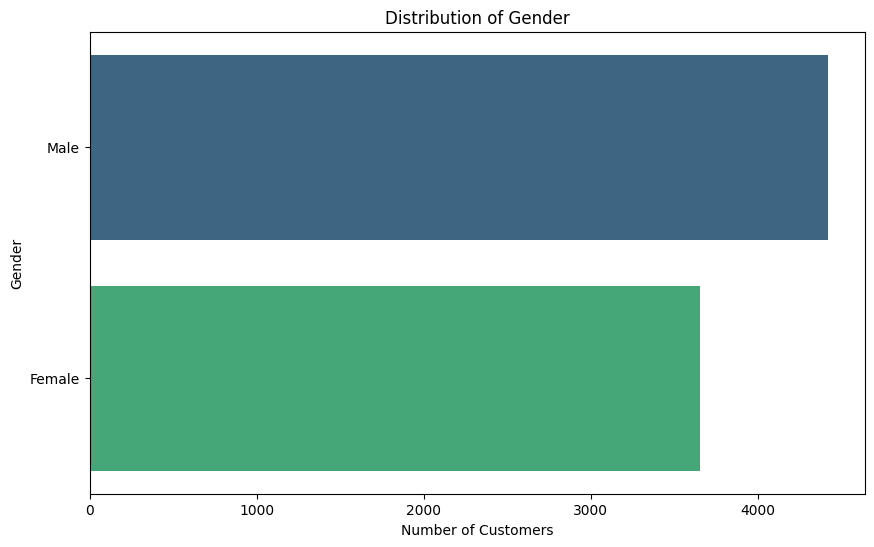

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


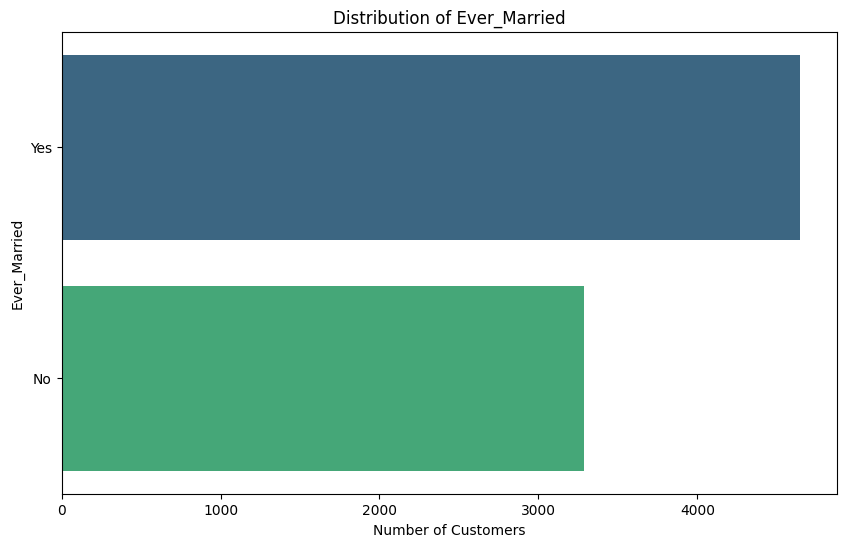

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


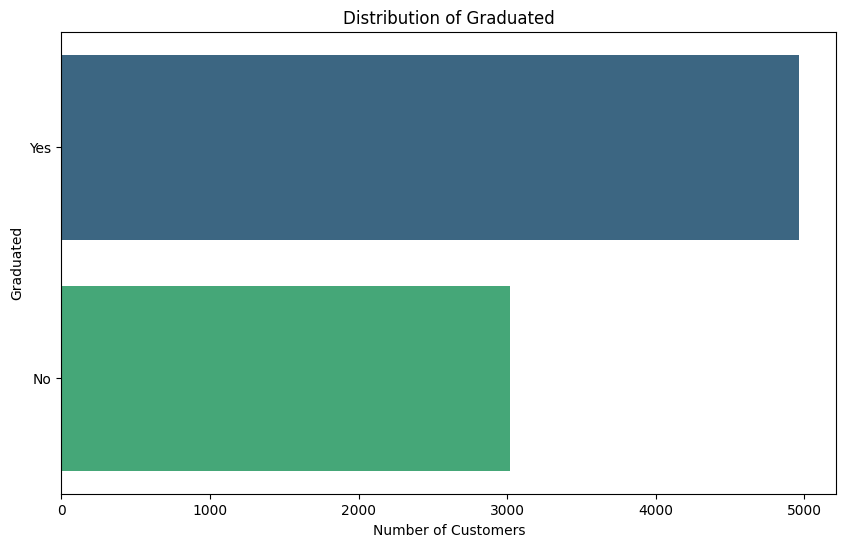

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


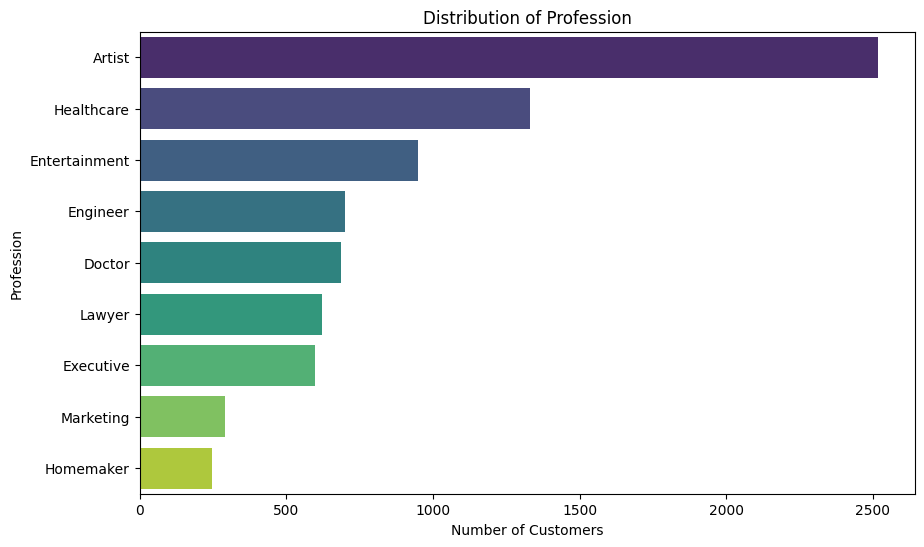

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


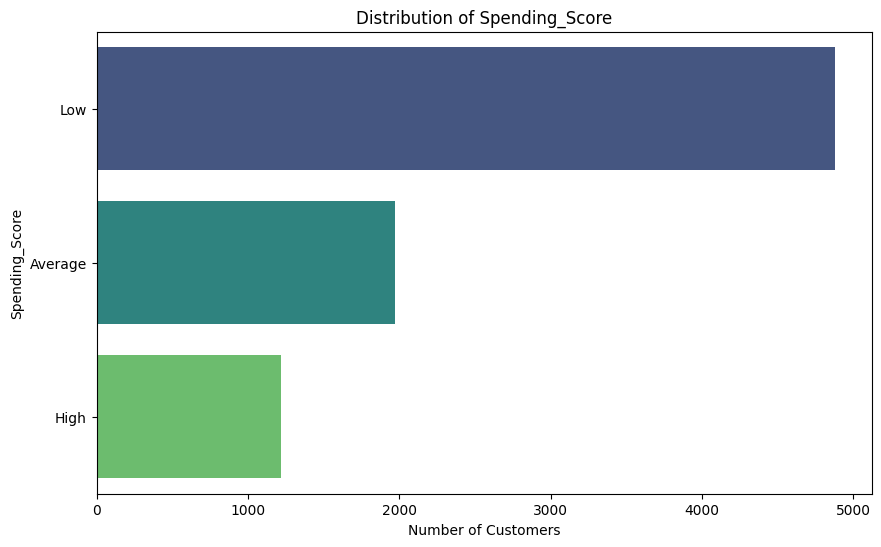

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


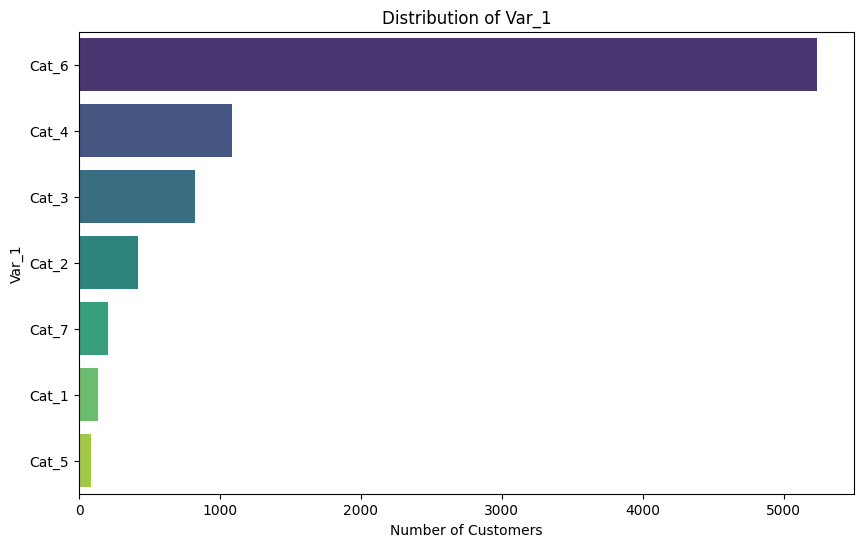

In [20]:
# Categorical Variables
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Number of Customers')
    plt.ylabel(col)
    plt.show()

/tmp/ipython-input-225638758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


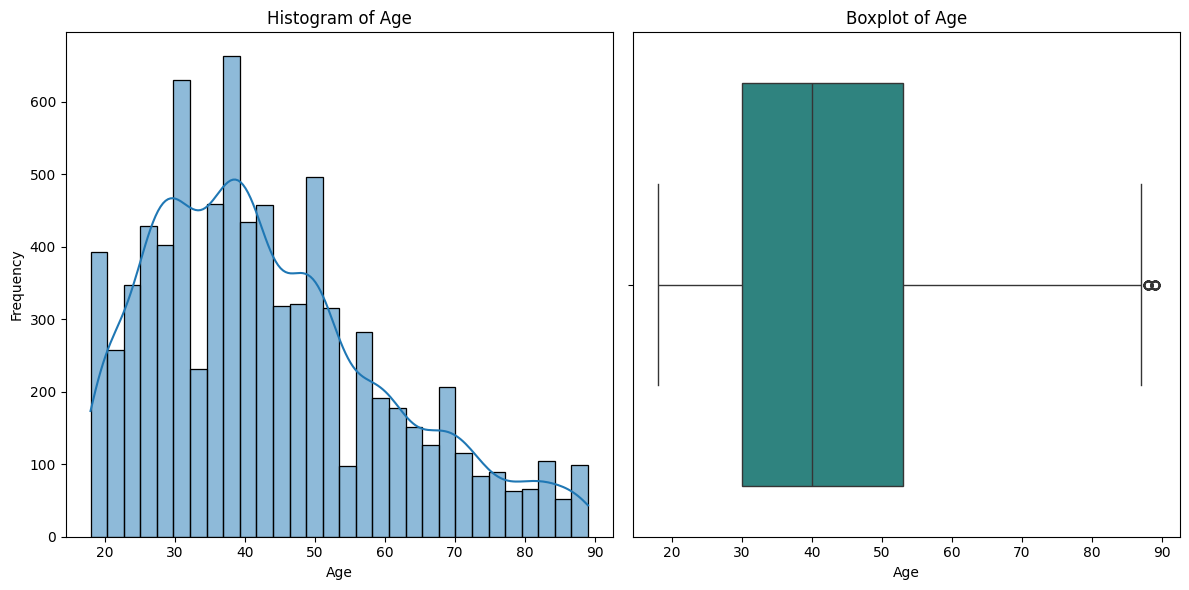

/tmp/ipython-input-225638758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


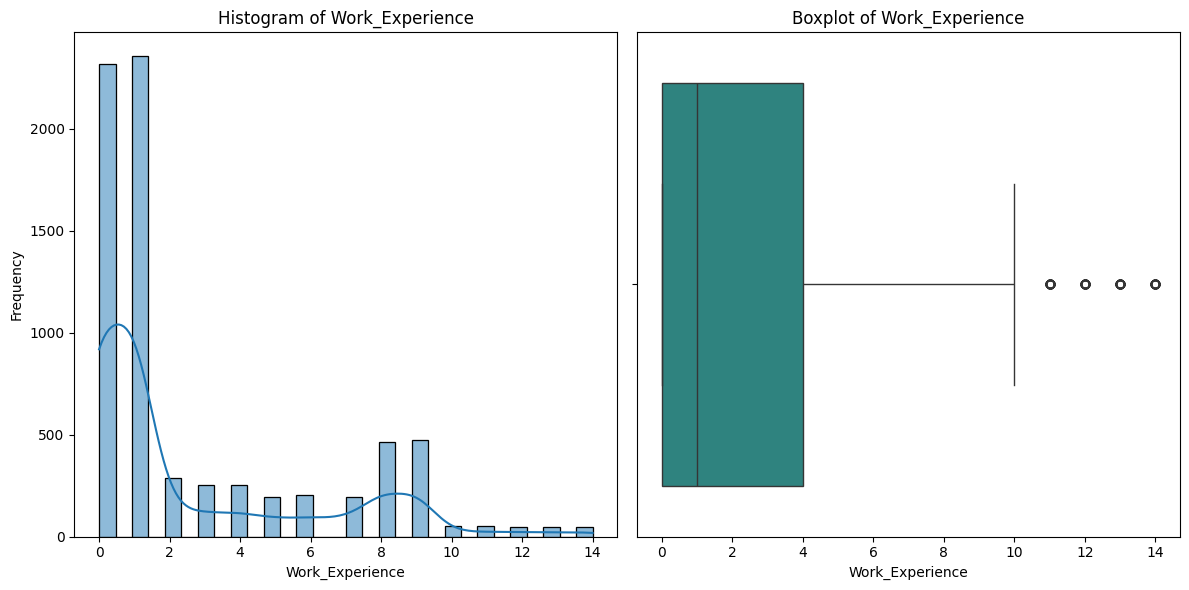

/tmp/ipython-input-225638758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


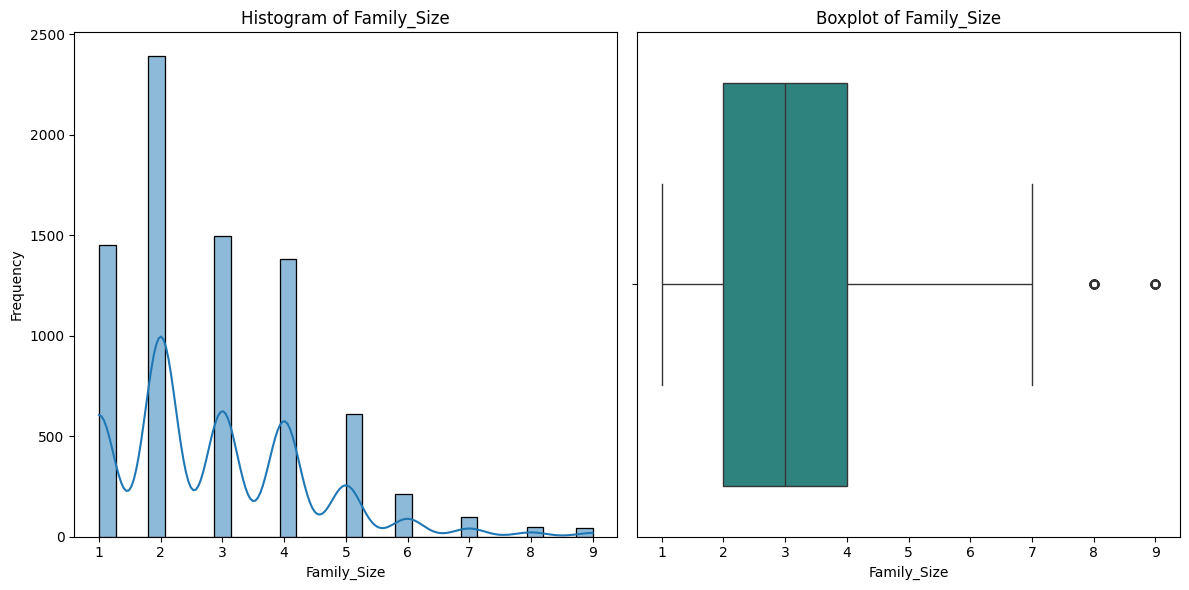

In [21]:
# Numerical Variables
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Interpretation:
# For categorical columns, note which categories appear most frequently.
# For numerical columns, look at the shape of the distribution (normal, skewed left/right). Boxplots help identify the presence of outliers.

### Task 2.3 - Bivariate Analysis (Relationship with Target)

After understanding the distribution of each variable, we will look at how these variables relate to our target variable `Segmentation`. This will help us identify features that might be most influential in predicting or grouping customers. We will use countplots with `hue` for categorical variables and boxplots/violinplots for numerical variables.

In [ ]:
# Task 2.3 - Bivariate Analysis (Relationship with Target)

# Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y=col, hue='Segmentation', palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Relationship between {col} and Segmentation')
    plt.xlabel('Number of Customers')
    plt.ylabel(col)
    plt.legend(title='Segmentation')
    plt.show()

# Numerical vs Target
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')
    plt.title(f'Relationship between Segmentation and {col}')
    plt.xlabel('Segment')
    plt.ylabel(col)
    plt.show()

# Interpretation:
# Observe how the distribution of customer segments changes based on the categories or value ranges of other features.
# Are there specific categories or value ranges that tend to be associated with certain segments?

### Task 2.4 - Multivariate Analysis

Finally, we will look at the relationships between numerical variables using a heatmap of the correlation matrix. This helps us detect multicollinearity, which is when two or more numerical features are highly correlated. Multicollinearity can affect the performance of some machine learning models.

In [ ]:
# Task 2.4 - Multivariate Analysis (Correlation between Numerical Features)

# Select only numerical columns
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numerical Feature Correlation Matrix')
plt.show()

# Interpretation:
# The numbers on the heatmap show the correlation coefficient between pairs of features.
# Values close to 1 or -1 indicate a strong correlation (positive or negative).
# Values close to 0 indicate a weak correlation.
# Note if there are pairs of features with very high correlation (e.g., > 0.7 or < -0.7), as this might indicate multicollinearity.